# Imports

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import periodogram
import scipy.spatial.distance as sp_distance
import seaborn as sns
import matplotlib
from brainiak.io import load_images
import nibabel as nib
from nilearn.plotting import plot_stat_map
from nilearn.image import mean_img

%matplotlib inline

/home/homeGlobal/oli/somato/raw/venvs/somato_env/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Simple SRM

## Load pickle

In [2]:
srm_pickle_path = '/home/homeGlobal/oli/somato/scratch/srm/srm.p'

with open(srm_pickle_path, 'rb') as f:
    srm = pickle.load(f)

## heatmap of extracted shared responses

SRM: Features X Time-points  (50, 256)


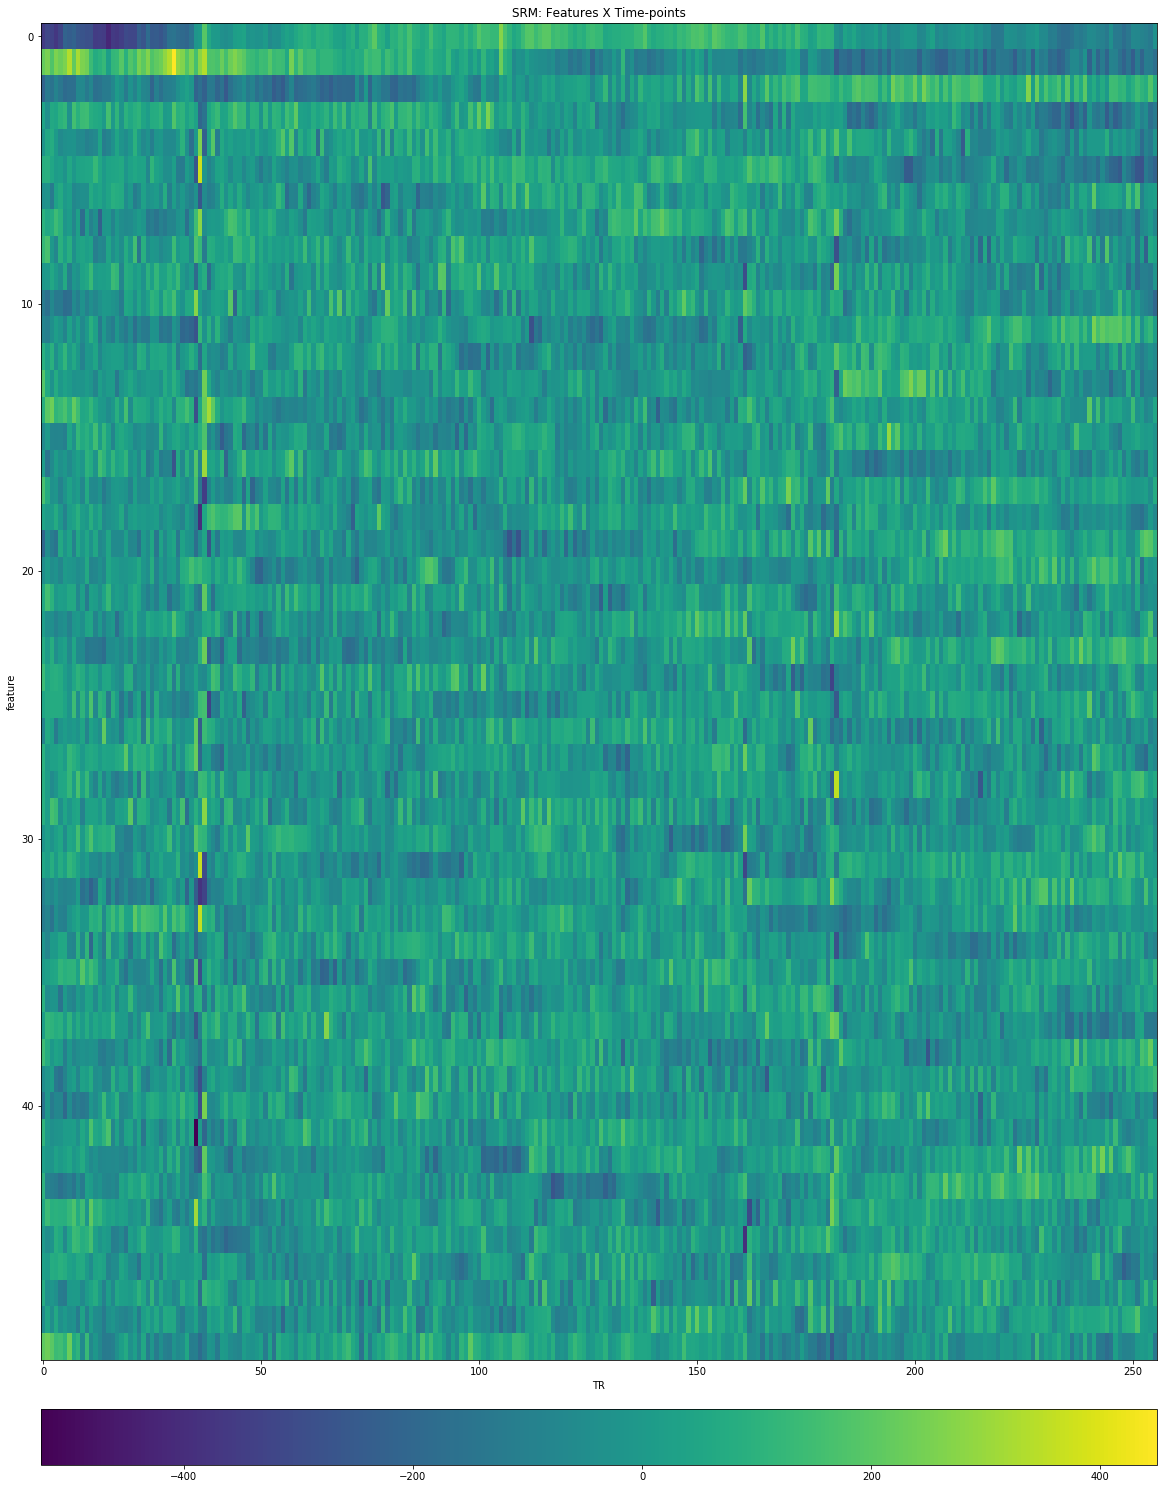

In [3]:
# Plot the shared response
print('SRM: Features X Time-points ', srm.s_.shape)
plt.figure(figsize=(20, 30))
plt.title('SRM: Features X Time-points')
plt.xlabel('TR')
plt.ylabel('feature')
plt.imshow(srm.s_, cmap='viridis', aspect='auto')
plt.colorbar(orientation='horizontal', pad=.03)  #fraction=0.03, 

## time course of specific shared response

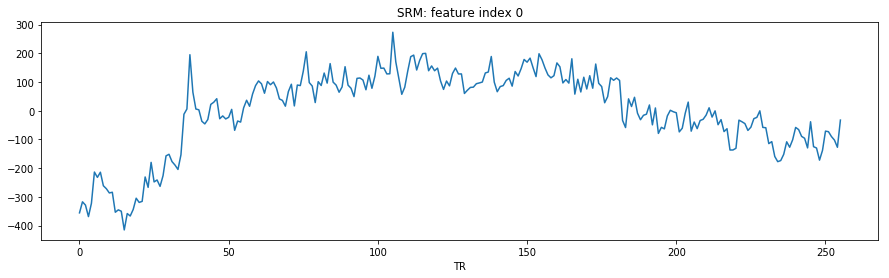

In [4]:
comp_idx = 0

plt.figure(figsize=(15, 4))
plt.title('SRM: feature index %i' % comp_idx)
plt.xlabel('TR')
plt.plot(srm.s_[comp_idx, :]);

## Power density spectra of all shared responses

Presented in a heat map (not very informative) and individual line plots.

In [5]:
# extrect powerdensities and frequencies for all our shared responses
# (frequencies list will be redundant repetitions)

frequencies, powerdensities = [], []

for comp in range(len(srm.s_)):
    freq, power = periodogram(srm.s_[comp,:])
    frequencies.append(freq)
    powerdensities.append(power)
    
frequencies = np.array(frequencies)
powerdensities = np.array(powerdensities)

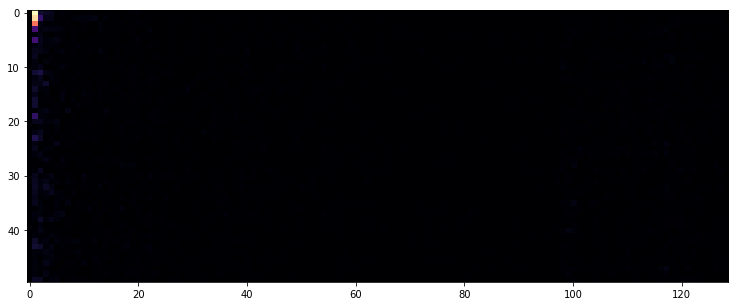

In [6]:
# plot as heatmap
plt.figure(figsize=(20, 5))
plt.imshow(powerdensities, cmap='magma')

Not surprisingly, the heatmap is mostly black because most power lies in lower range frequencies. Next, we will plot individual power density line plots across the frequency spectrum. Our stimulation frequency is marked as a red line.

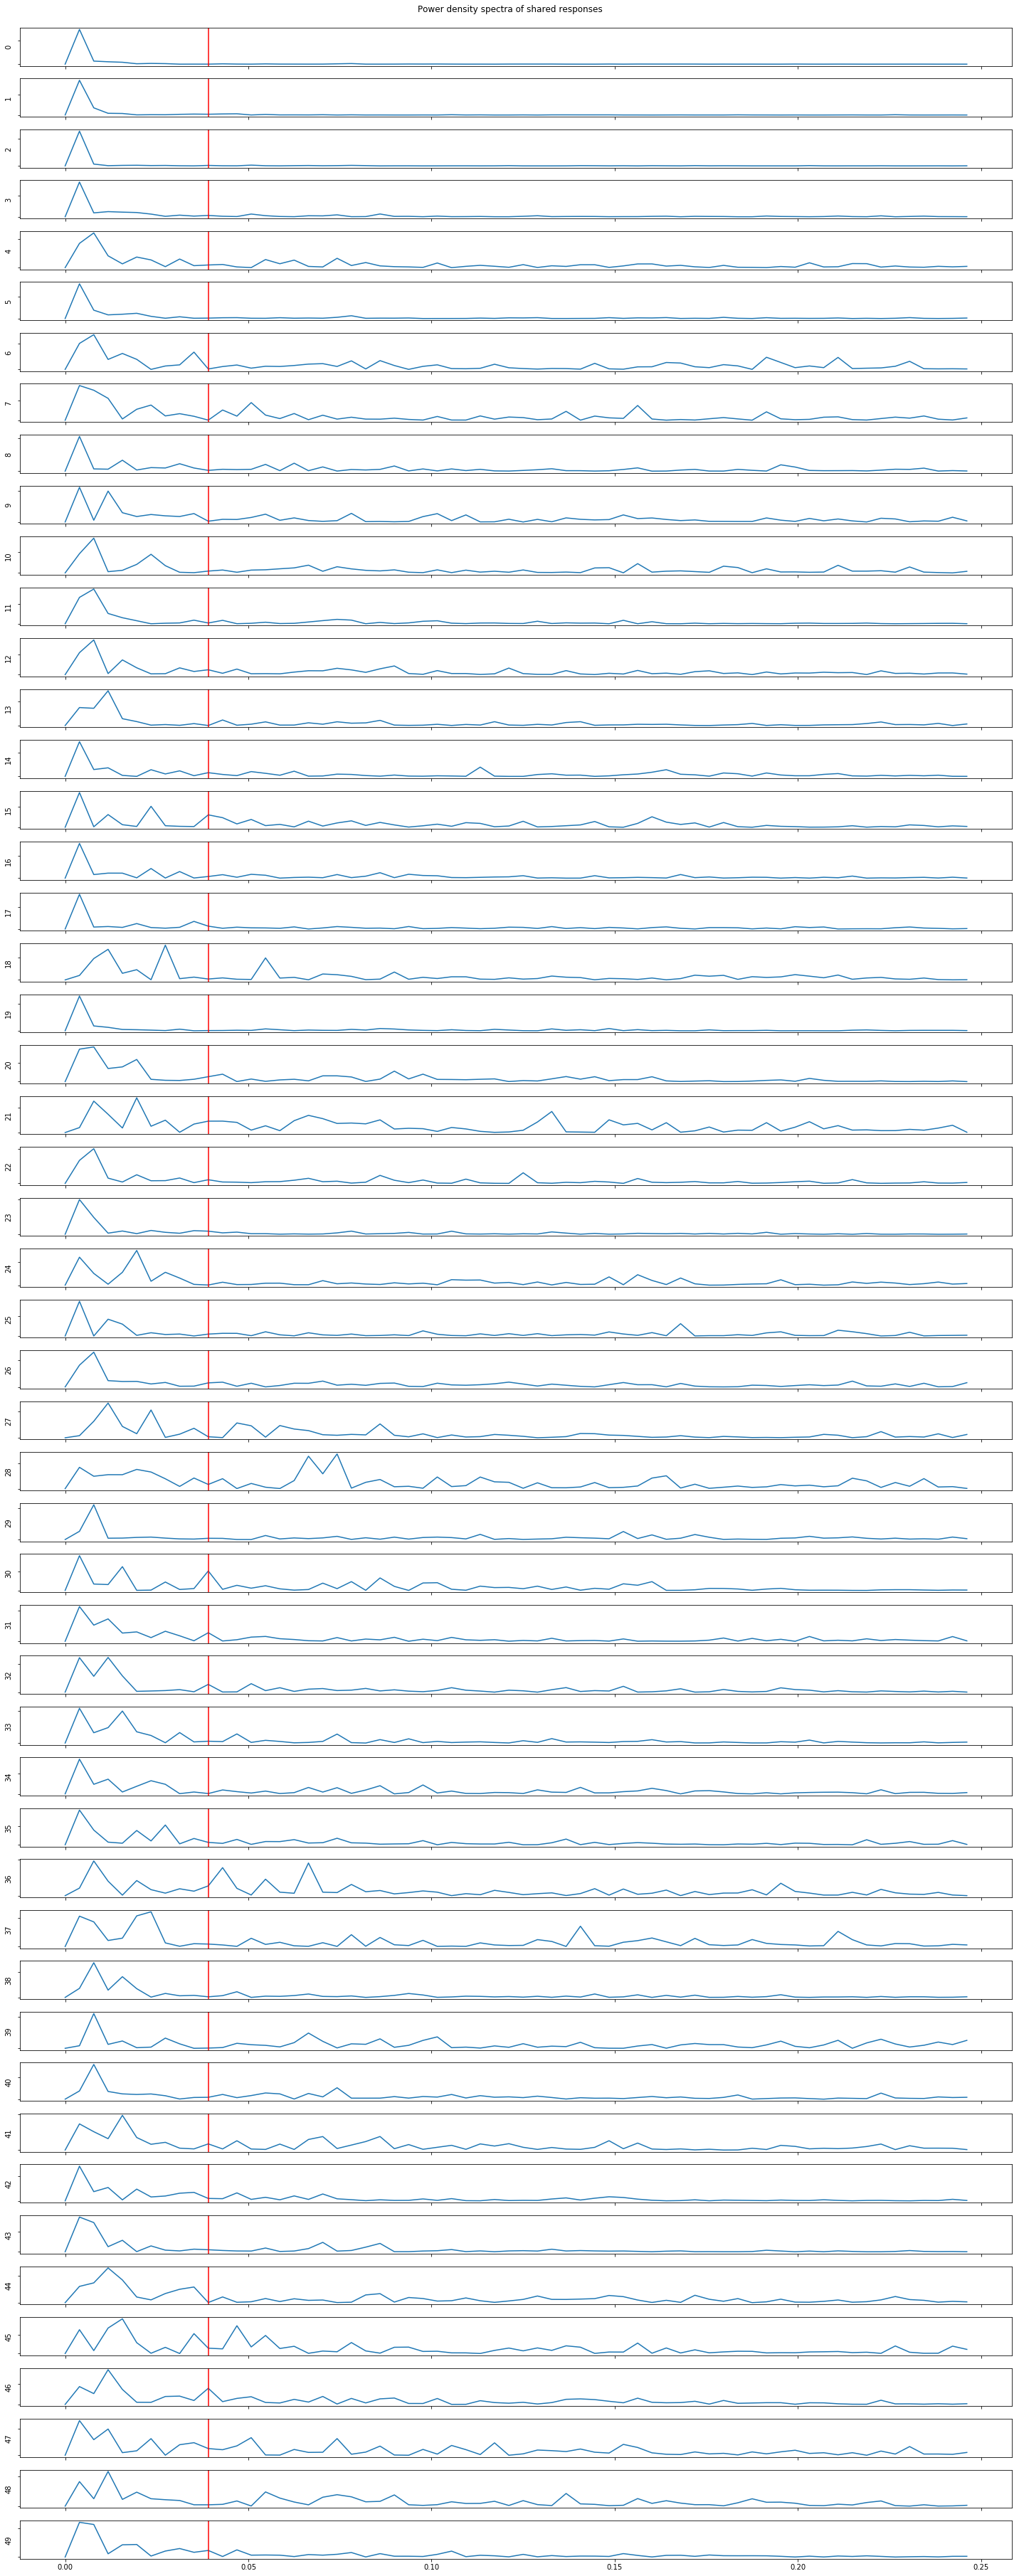

In [7]:
# only show lower half of frequency spectrum to avoid clutter
cut_to_length = int(len(powerdensities[0,:]) / 2)

fig, axs = plt.subplots(nrows=len(srm.s_), figsize=(20,50))
fig.suptitle('Power density spectra of shared responses', y=1.005)

for comp_idx in range(len(srm.s_)):
    sns.lineplot(y=powerdensities[comp_idx,:cut_to_length],
                 x=frequencies[comp_idx,:cut_to_length],
                 ax=axs[comp_idx])
    axs[comp_idx].axvline(0.0390625, color='red')
    axs[comp_idx].set_yticklabels([])
    if comp_idx != len(srm.s_)-1:
        axs[comp_idx].set_xticklabels([])
    axs[comp_idx].set_ylabel('%i' % comp_idx)
    
plt.tight_layout()

## Conclusions

- we run into the same selection problem as with ICA: How **exactly** do we decide, which components might match our stimulation cycle and therefore might represent our digits?
- temporal filtering should allow us to narrow down the search for our components

# Robust SRM

## Load pickle

In [8]:
rsrm_pickle_path = '/home/homeGlobal/oli/somato/scratch/srm/rsrm.p'

with open(rsrm_pickle_path, 'rb') as f:
    rsrm = pickle.load(f)

In [9]:
# this is where you find shared responses
print(rsrm.r_.shape)

# and individual responses (list of flat arrays, each contains subjects' voxels)
print(len(rsrm.s_))

(50, 256)
12


## Heatmap of extracted shared responses

R-SRM: Features X Time-points  (50, 256)


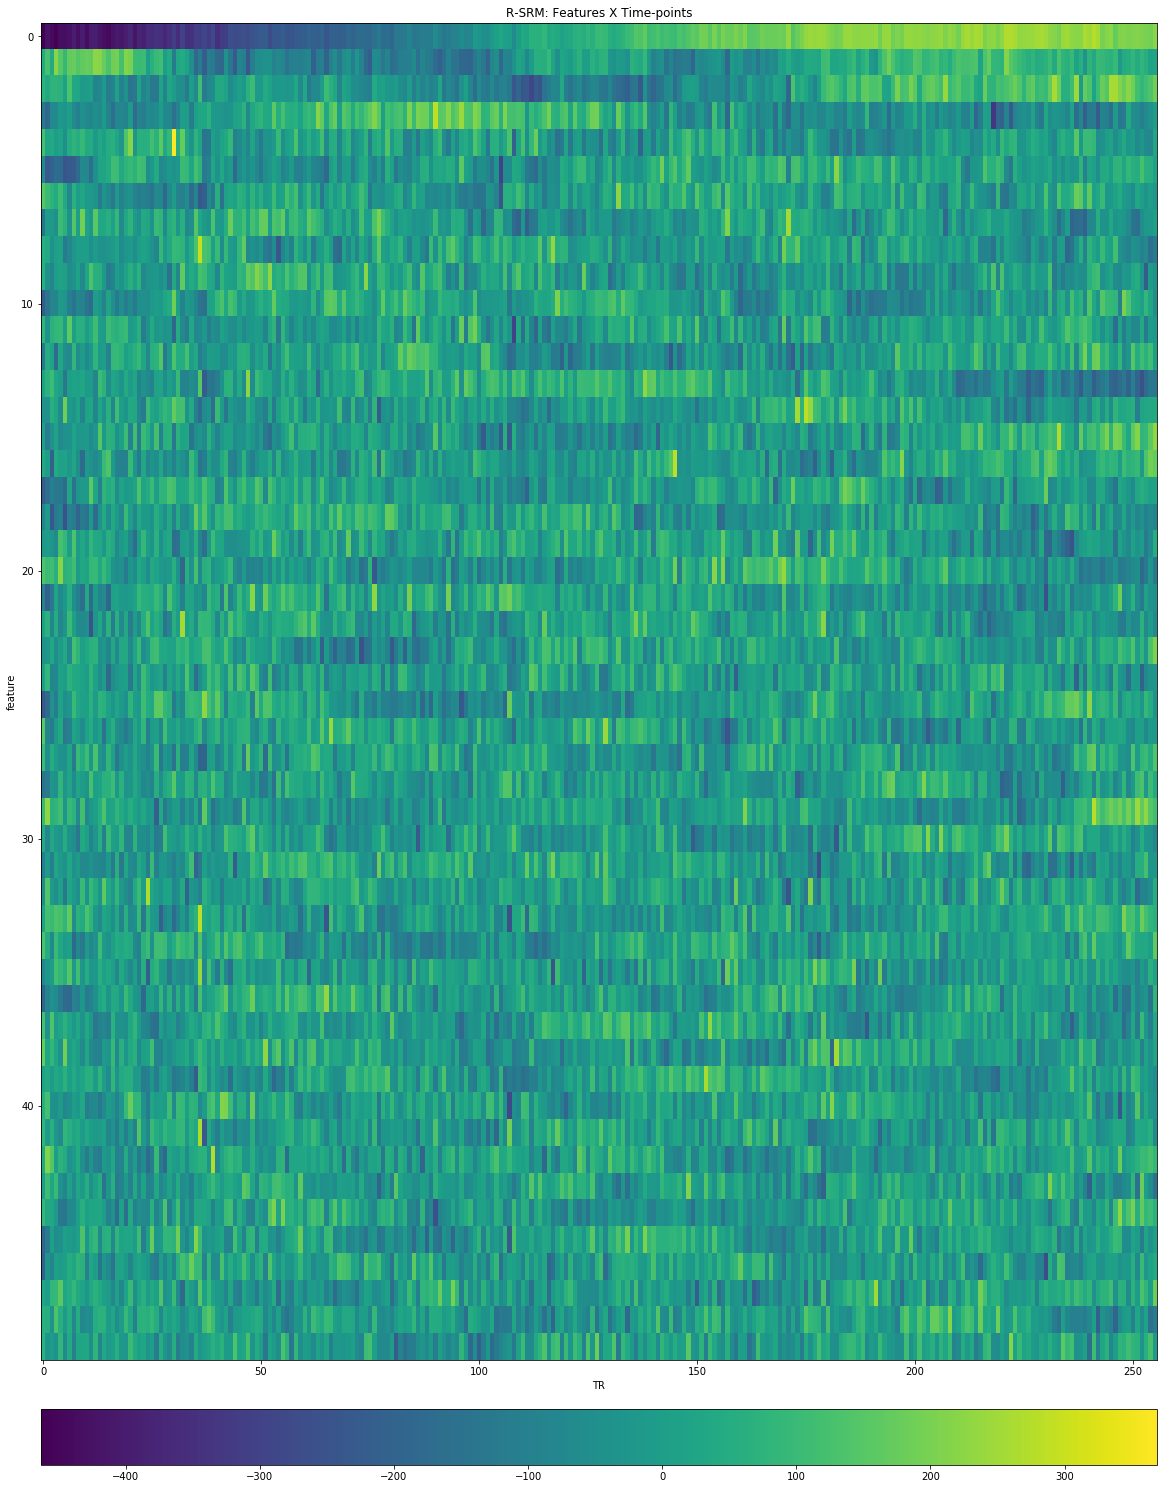

In [10]:
# Plot the shared response
print('R-SRM: Features X Time-points ', rsrm.r_.shape)
plt.figure(figsize=(20, 30))
plt.title('R-SRM: Features X Time-points')
plt.xlabel('TR')
plt.ylabel('feature')
plt.imshow(rsrm.r_, cmap='viridis', aspect='auto')
plt.colorbar(orientation='horizontal', pad=.03)  #fraction=0.03, 

## Power density spectra of shared responses

In [11]:
# extrect powerdensities and frequencies for all our shared responses
# (frequencies list will be redundant repetitions)

frequencies, powerdensities = [], []

for comp in range(len(rsrm.r_)):
    freq, power = periodogram(rsrm.r_[comp,:], fs=.5)
    frequencies.append(freq)
    powerdensities.append(power)
    
frequencies = np.array(frequencies)
powerdensities = np.array(powerdensities)

In [12]:
# plot as heatmap
#plt.figure(figsize=(20, 5))
#plt.imshow(powerdensities, cmap='magma')

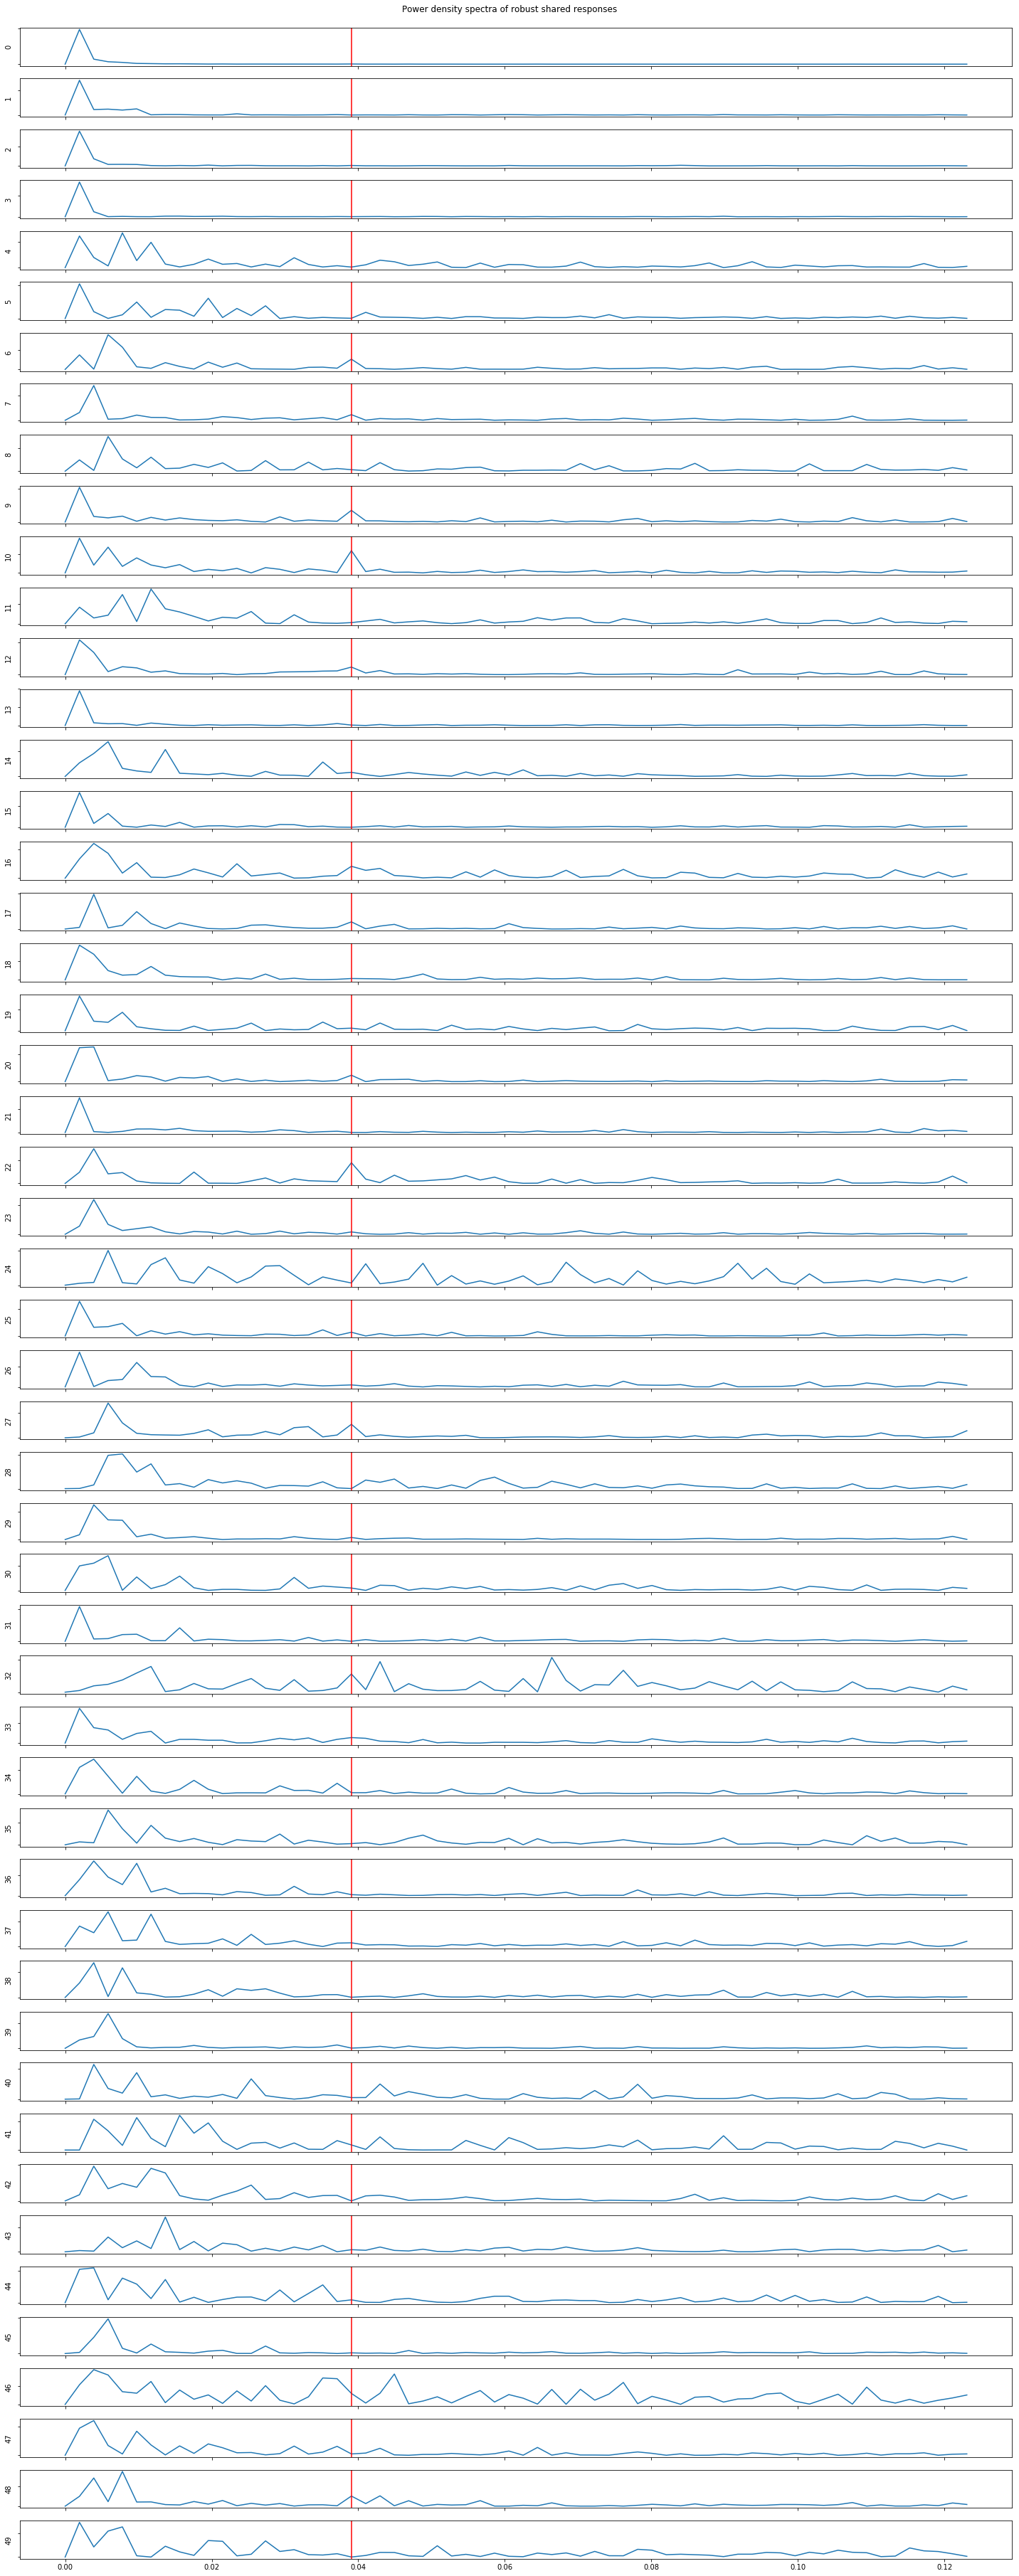

In [13]:
# only show lower half of frequency spectrum to avoid clutter
cut_to_length = int(len(powerdensities[0,:]) / 2)

fig, axs = plt.subplots(nrows=len(rsrm.r_), figsize=(20,50))
fig.suptitle('Power density spectra of robust shared responses', y=1.005)

for comp_idx in range(len(rsrm.r_)):
    sns.lineplot(y=powerdensities[comp_idx,:cut_to_length],
                 x=frequencies[comp_idx,:cut_to_length],
                 ax=axs[comp_idx])
    axs[comp_idx].axvline(0.0390625, color='red')
    axs[comp_idx].set_yticklabels([])
    if comp_idx != len(rsrm.r_)-1:
        axs[comp_idx].set_xticklabels([])
    axs[comp_idx].set_ylabel('%i' % comp_idx)
    
plt.tight_layout()

# SRM on filtered data

## Simple SRM

In [14]:
fsrm_pickle_path = '/home/homeGlobal/oli/somato/scratch/srm_filtered/srm.p'

with open(fsrm_pickle_path, 'rb') as f:
    fsrm = pickle.load(f)

In [15]:
frequencies, powerdensities = [], []

for comp in range(len(fsrm.s_)):
    freq, power = periodogram(fsrm.s_[comp,:], fs=.5)
    frequencies.append(freq)
    powerdensities.append(power)
    
frequencies = np.array(frequencies)
powerdensities = np.array(powerdensities)

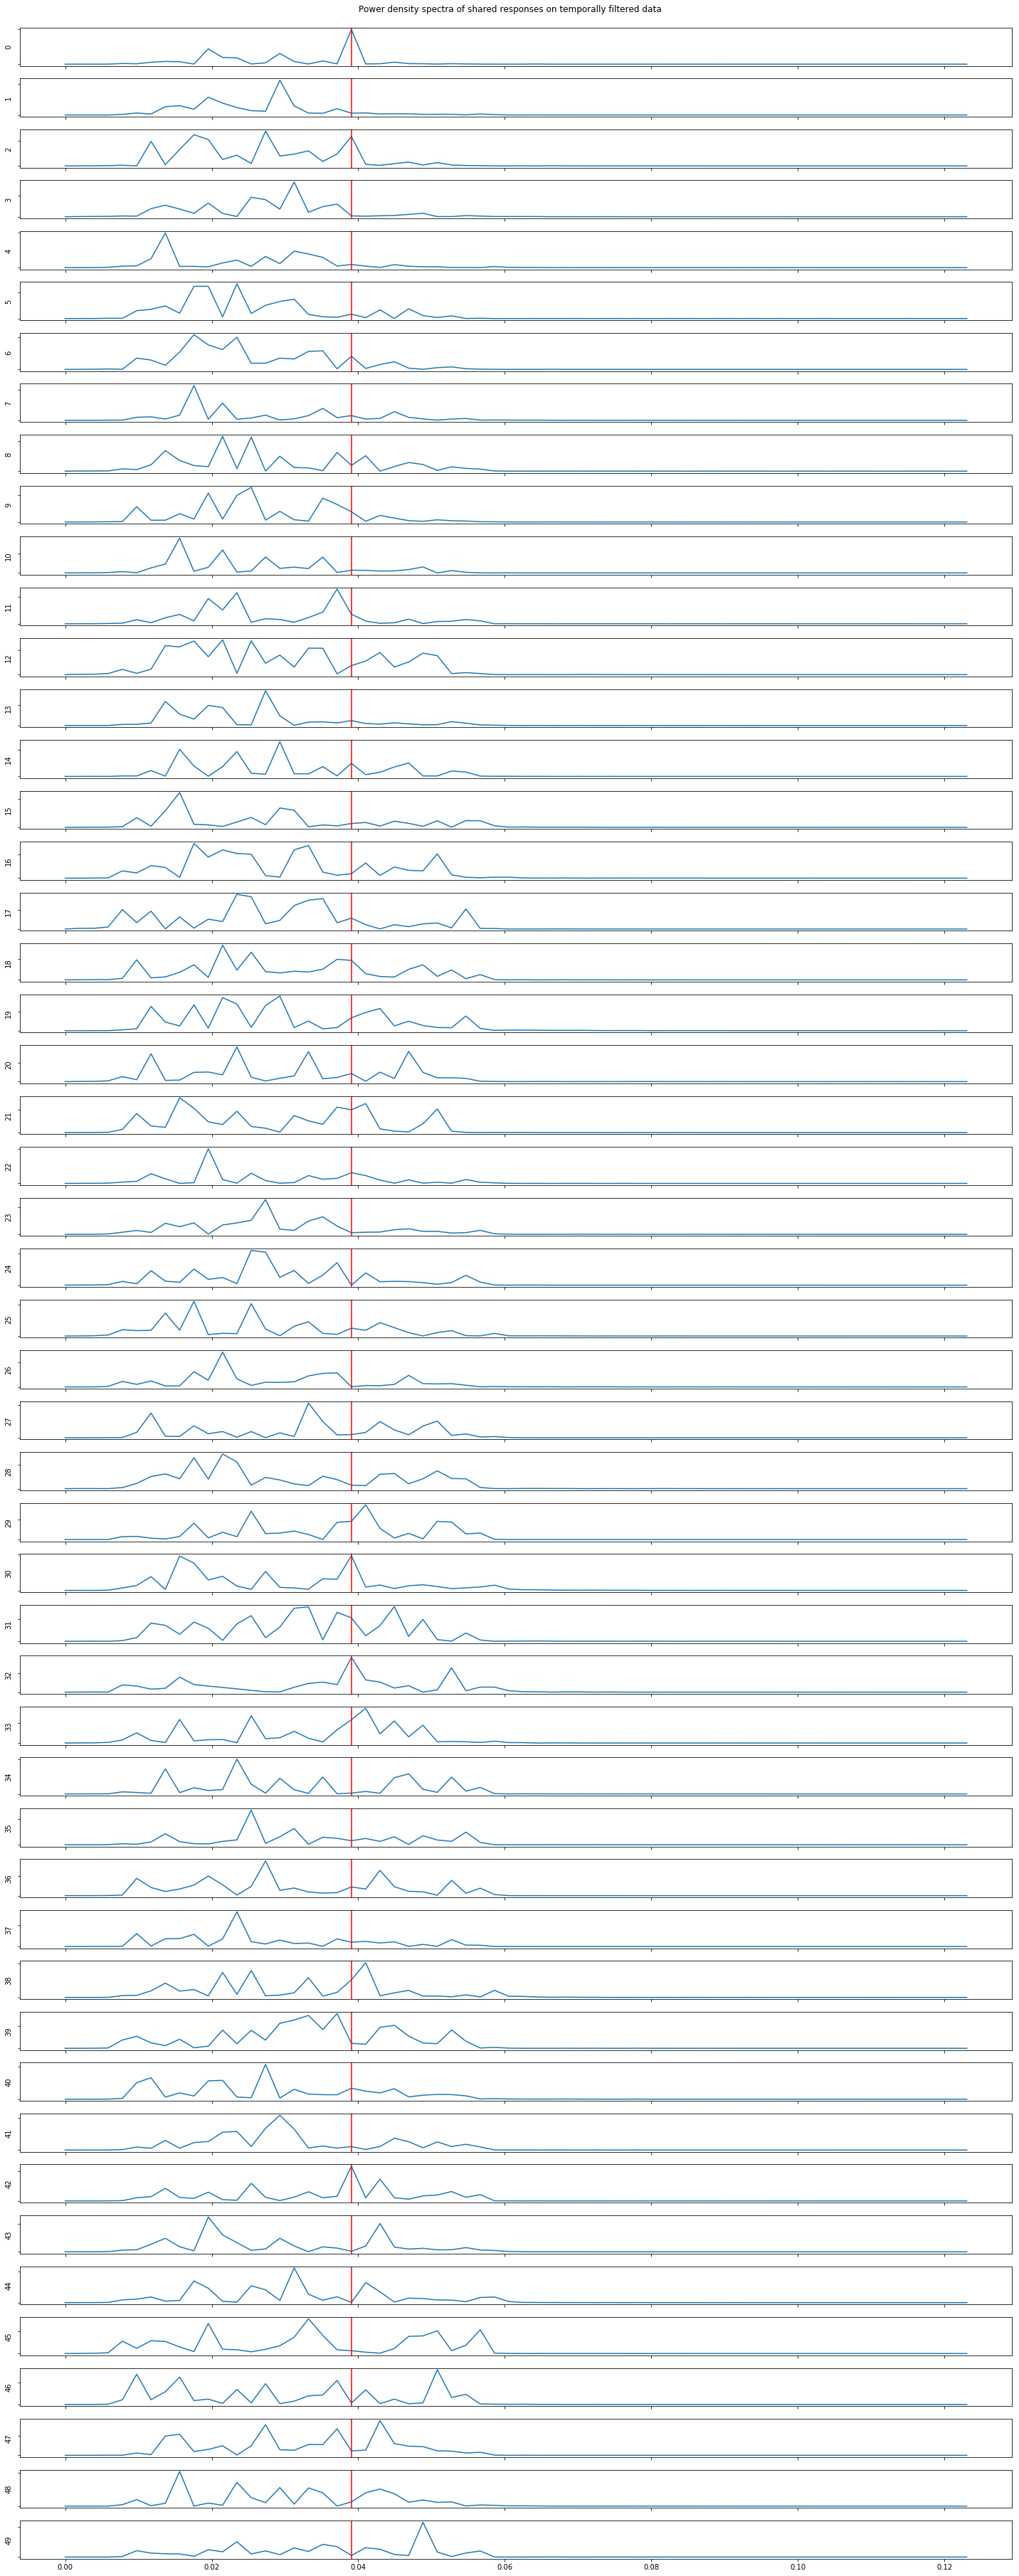

In [16]:
# only show lower half of frequency spectrum to avoid clutter
cut_to_length = int(len(powerdensities[0,:]) / 2)

fig, axs = plt.subplots(nrows=len(fsrm.s_), figsize=(20,50))
fig.suptitle('Power density spectra of shared responses on temporally filtered data', y=1.005)

for comp_idx in range(len(fsrm.s_)):
    sns.lineplot(y=powerdensities[comp_idx,:cut_to_length],
                 x=frequencies[comp_idx,:cut_to_length],
                 ax=axs[comp_idx])
    axs[comp_idx].axvline(0.0390625, color='red')  # stimulation cycle frequency
    axs[comp_idx].set_yticklabels([])
    if comp_idx != len(fsrm.s_)-1:
        axs[comp_idx].set_xticklabels([])
    axs[comp_idx].set_ylabel('%i' % comp_idx)
    
plt.tight_layout()

### Time course of candidate component

Text(0.5, 1.0, 'time course of first shared response')

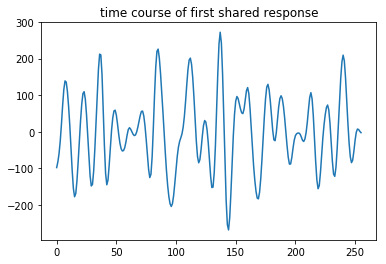

In [17]:
comp_idx=0
sns.lineplot(y=fsrm.s_[0], x=range(len(fsrm.s_[0])))
plt.title('time course of first shared response')

### Similarity between time points

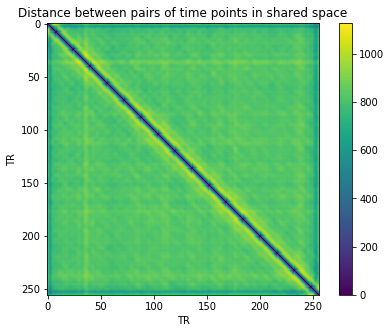

In [18]:
dist_mat = sp_distance.squareform(sp_distance.pdist(fsrm.s_.T))
plt.figure(figsize=(7,5))
plt.title('Distance between pairs of time points in shared space')
plt.xlabel('TR')
plt.ylabel('TR')
plt.imshow(dist_mat, cmap='viridis')
plt.colorbar()

Variance only close to the diagonal because we filtered out all potential lower frequency information.

### Map shared response to subject space

#### Weight matrix

srm.w_ contains list of weight matrices. List entries represent matrix for given subject. Each weight matrix has shape voxels * components.

Low between-subject correlations can indicate insufficiency of anatomical alignment alone: 
- for given voxel across components
- for all voxels and one component

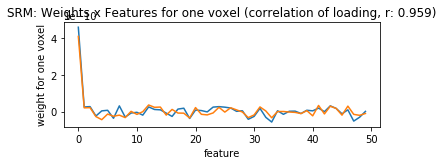

In [19]:
plt.subplot(211)
plt.plot(fsrm.w_[0][0,:])
plt.plot(fsrm.w_[1][0,:])
feature_corr = np.corrcoef(fsrm.w_[0][0,:], fsrm.w_[1][0,:].T)[0,1]
plt.title('SRM: Weights x Features for one voxel (correlation of loading, r: %0.3f)' % feature_corr) 
plt.xlabel('feature')
plt.ylabel('weight for one voxel')
plt.tight_layout()

#### Map back

In [20]:
def save_sharedresponse_to_subspace(srm_instance,
                                    orig_bold,
                                    sub_id=0,
                                    response_id=0,
                                    outfile='vw_test.nii.gz'):
    # TODO: header will have false time dimension

    # grab voxel weights for example component and subject
    vw_flat = srm_instance.w_[sub_id][:,response_id]

    # load original (filtered) bold image with nibabel
    img = nib.load(orig_bold)

    # reshape flat voxel weight array to match original bold data
    # TODO: write assertions for this ...
    orig_shape_ts = img.get_shape()
    orig_shape = orig_shape_ts[:-1]  # remove time (last array dimension)
    vw_reshaped = np.reshape(vw_flat, orig_shape)

    # save to new nifti
    vw_img = nib.Nifti1Image(vw_reshaped, img.affine, img.header)  
    nib.save(vw_img, outfile)
    
    return None

In [21]:
sub1_fbold = '/home/homeGlobal/oli/somato/scratch/ica/MELODIC/melodic_wf_workdir/subject_lvl/somato_melodic_wf/bpf/mapflow/_bpf0/data_brain_smooth_filt.nii.gz'
sub2_fbold = '/home/homeGlobal/oli/somato/scratch/ica/MELODIC/melodic_wf_workdir/subject_lvl/somato_melodic_wf/bpf/mapflow/_bpf2/data_brain_smooth_filt.nii.gz'

save_sharedresponse_to_subspace(fsrm, sub1_fbold, sub_id=0, outfile='comp1_sub1.nii.gz', response_id=0)
save_sharedresponse_to_subspace(fsrm, sub2_fbold, sub_id=1, outfile='comp1_sub2.nii.gz', response_id=0)

/home/homeGlobal/oli/somato/raw/venvs/somato_env/lib/python3.5/site-packages/ipykernel_launcher.py:16: DeprecationWarning: get_shape method is deprecated.
Please use the ``img.shape`` property instead.

* deprecated from version: 1.2
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 3.0
  app.launch_new_instance()


## Robust SRM

In [22]:
# load pickle
frsrm_pickle_path = '/home/homeGlobal/oli/somato/scratch/srm_filtered/rsrm.p'
with open(frsrm_pickle_path, 'rb') as f:
    frsrm = pickle.load(f)

In [23]:
# calculate power spectrum of components
frequencies, powerdensities = [], []
for comp in range(len(frsrm.r_)):
    freq, power = periodogram(frsrm.r_[comp,:], fs=.5)
    frequencies.append(freq)
    powerdensities.append(power)
frequencies = np.array(frequencies)
powerdensities = np.array(powerdensities)

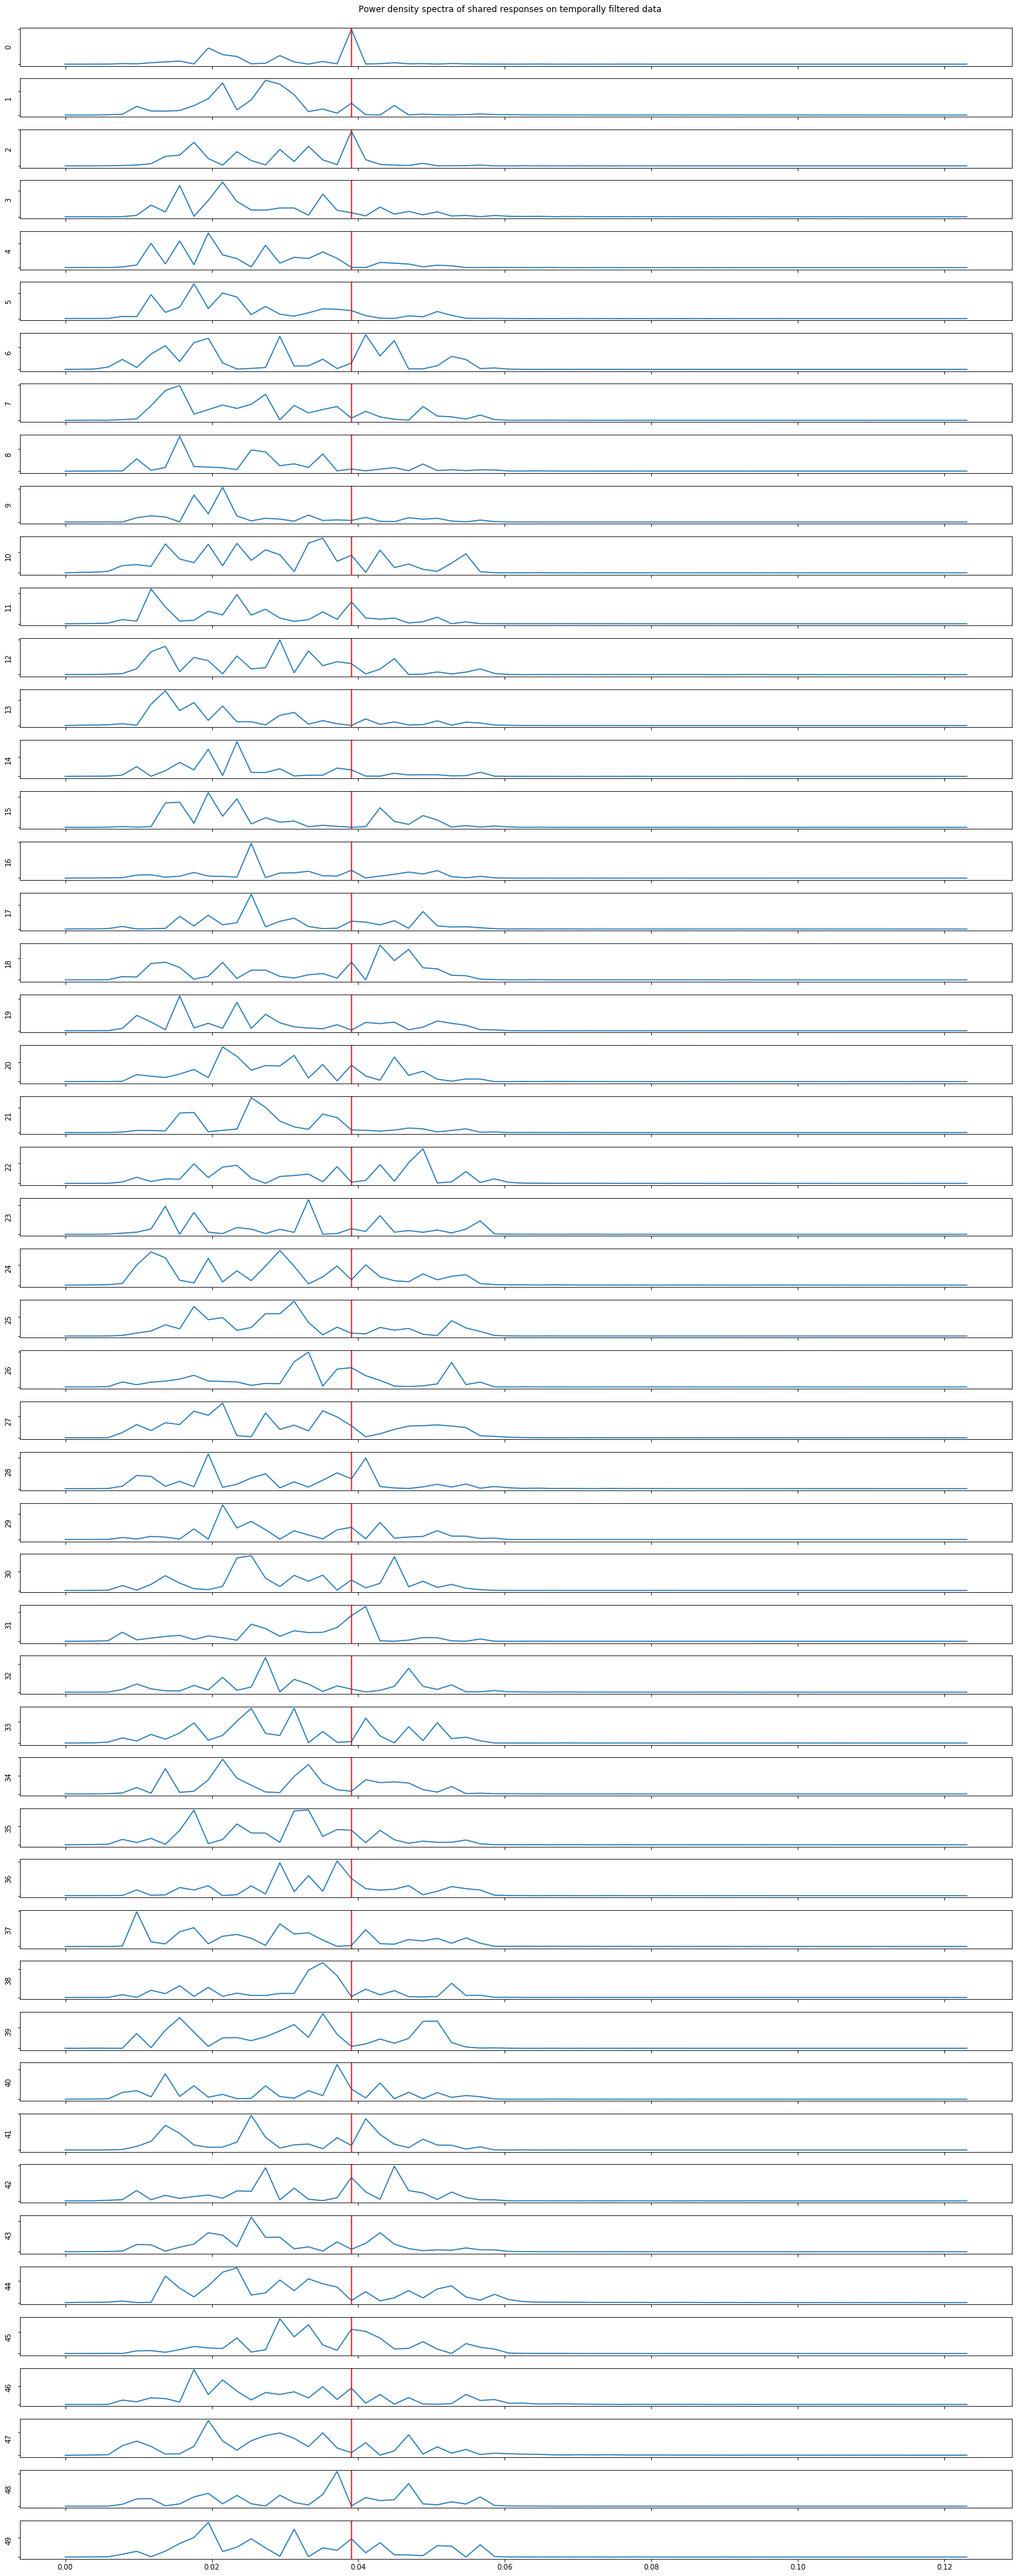

In [24]:
# Again, plot power spectra
cut_to_length = int(len(powerdensities[0,:]) / 2)

fig, axs = plt.subplots(nrows=len(frsrm.r_), figsize=(20,50))
fig.suptitle('Power density spectra of shared responses on temporally filtered data', y=1.005)

for comp_idx in range(len(frsrm.r_)):
    sns.lineplot(y=powerdensities[comp_idx,:cut_to_length],
                 x=frequencies[comp_idx,:cut_to_length],
                 ax=axs[comp_idx])
    axs[comp_idx].axvline(0.0390625, color='red')  # stimulation cycle frequency
    axs[comp_idx].set_yticklabels([])
    if comp_idx != len(frsrm.r_)-1:
        axs[comp_idx].set_xticklabels([])
    axs[comp_idx].set_ylabel('%i' % comp_idx)
    
plt.tight_layout()

Several components peak at frequency of interest. Plot component 1 and 3 since they have their maxima at stimulation frequency.

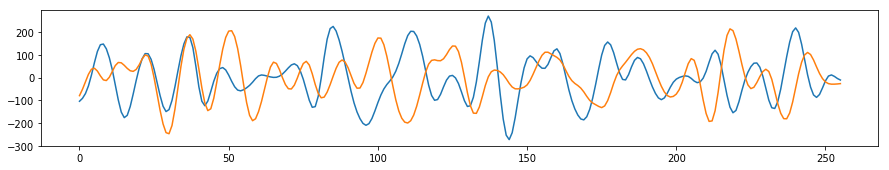

In [28]:
plt.figure(figsize=(15,2.5))
for comp_idx in [0,2]:
    sns.lineplot(y=frsrm.r_[comp_idx], x=range(len(frsrm.r_[comp_idx])))
#plt.title('time course of first shared response')

Whether these two components are sensibly phase shifted is hard to say... definitely not at all times.